In [1]:
# Imports you'll need.
from collections import Counter
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import sys
import time

import re
from collections import defaultdict
#import configparser
from operator import itemgetter, attrgetter
#from OpenSSL.rand import screen


In [2]:
#from TwitterAPI import TwitterAPI
from TwitterAPI import TwitterAPI


In [3]:
friend_dict= defaultdict(list)

consumer_key = 'b2a5ZEs5hDPJNv16I392Pi9E7'
consumer_secret = 'G7WW7PAEmOP39jaQjqvxpLV7YgF1G1QS90QMH0pKmK88un8eHX'
access_token = '319052563-IQ2zT07FN9BEhVs6Vgb6NaduB9To32bmqVF8LJ1C'
access_token_secret = 'x31vrAHRXCxKZgYXQWHWPv8YCwPVP1n9NHDo9tJ44xDJ1'



In [4]:

# This method is done for you.
def get_twitter():
    """ Read the config_file and construct an instance of TwitterAPI.
    Args:
      config_file ... A config file in ConfigParser format with Twitter credentials
    Returns:
      An instance of TwitterAPI.
    """
    return (TwitterAPI(consumer_key, consumer_secret, access_token, access_token_secret))




In [5]:

def read_screen_names(filename):

  #  Read a text file containing Twitter screen_names, one per line.

   # Params:
    #    filename....Name of the file to read.
    #Returns:
     #   A list of strings, one per screen_name, in the order they are listed
      #  in the file.

   # Here's a doctest to confirm your implementation is correct.
    #>>> read_screen_names('candidates.txt')
    #['DrJillStein', 'GovGaryJohnson', 'HillaryClinton', 'realDonaldTrump']
   
    ###TODO
   
    f = open(filename, 'r')
    strings = re.findall(r"\S+", f.read())
    #print(strings)
    
    return(strings)


In [6]:

# I've provided the method below to handle Twitter's rate limiting.
# You should call this method whenever you need to access the Twitter API.
def robust_request(twitter, resource, params, max_tries=5):
    """ If a Twitter request fails, sleep for 15 minutes.
    Do this at most max_tries times before quitting.
    Args:
      twitter .... A TwitterAPI object.
      resource ... A resource string to request; e.g., "friends/ids"
      params ..... A parameter dict for the request, e.g., to specify
                   parameters like screen_name or count.
      max_tries .. The maximum number of tries to attempt.
    Returns:
      A TwitterResponse object, or None if failed.
    """
    #print('\nIn robust _request')   
    for i in range(max_tries):
        #print('resource=%s' % resource)
        #print('params =%s' % params)
        #print(twitter)
        request = twitter.request(resource,{'screen_name':params})
        if request.status_code == 200:
            #print('Success In Robust_Request')
            return request
        else:
            print('Got error %s \nsleeping for 15 minutes.' % request.text)
            sys.stderr.flush()
            time.sleep(61 * 15)


In [7]:

def get_users(twitter, screen_names):
    """Retrieve the Twitter user objects for each screen_name.
        Params:
        twitter........The TwitterAPI object.
        screen_names...A list of strings, one per screen_name
    Returns:
        A list of dicts, one per user, containing all the user information
        (e.g., screen_name, id, location, etc)

    See the API documentation here: https://dev.twitter.com/rest/reference/get/users/lookup

    In this example, I test retrieving two users: twitterapi and twitter.

    >>> twitter = get_twitter()
    >>> users = get_users(twitter, ['twitterapi', 'twitter'])
    >>> [u['id'] for u in users]
    [6253282, 783214]
    """
    ###TODO
    list = []
    
    resource= 'users/lookup'
   
    #print('In get User')
    params = [r for r in screen_names]
    #print('Found %d params' % len(params))
    

    request = robust_request(twitter,resource,params)        
    tweets = [r for r in request]
            
    for i in range(len(tweets)) :
        a_tweet = tweets[i]            
        #print('\nId=%d, \tScreen_Name=%s, \tName=%s, \tLocation=%s' % (a_tweet['id'],a_tweet['screen_name'],a_tweet['name'], a_tweet['location']))    
        list.append (a_tweet)
        

     
    #print('In Printing List')        
    #for i in range(len(list)):
       #  print(list) 

    return(list)

In [8]:
 

def get_friends(twitter, screen_name):
    """ Return a list of Twitter IDs for users that this person follows, up to 5000.
    See https://dev.twitter.com/rest/reference/get/friends/ids

    Note, because of rate limits, it's best to test this method for one candidate before trying
    on all candidates.

    Args:
        twitter.......The TwitterAPI object
        screen_name... a string of a Twitter screen name
    Returns:
        A list of ints, one per friend ID, sorted in ascending order.

    Note: If a user follows more than 5000 accounts, we will limit ourselves to
    the first 5000 accounts returned.

    In this test case, I return the first 5 accounts that I follow.
    >>> twitter = get_twitter()
    >>> get_friends(twitter, 'aronwc')[:5]
    [695023, 1697081, 8381682, 10204352, 11669522]
    """
    ###TODO

    friend_list =[int]
    #print('\nIn get_friends') 
    #print(screen_name)
    request = twitter.request('friends/ids', {'screen_name':screen_name , 'count':5000})

    
    friend_list = [r for r in request] 
    #print('\n Help on twitter.request for friends/ids copied to friend_list')


    #print('Number of Friends -> %d' % len(friend_list))
    #print('Sorting')
    friend_list.sort()
    #print('Sorted Friend List of Screen_Name %s ->%s' % (screen_name,friend_list))
   

    return(friend_list)

#    pass

In [9]:

def add_all_friends(twitter, users):
    """ Get the list of accounts each user follows.
    I.e., call the get_friends method for all 4 candidates.

    Store the result in each user's dict using a new key called 'friends'.

    Args:
        twitter...The TwitterAPI object.
        users.....The list of user dicts.
    Returns:
        Nothing

    >>> twitter = get_twitter()
    >>> users = [{'screen_name': 'aronwc'}]
    >>> add_all_friends(twitter, users)
    >>> users[0]['friends'][:5]
    [695023, 1697081, 8381682, 10204352, 11669522]
    """
    ###TODO
    friends = dict ()

    #print('\nIn function add_all_friends')
    #print('No of Users =%d ' %len(users))
    #print(users[0]['screen_name'])  # working
    no_of_user = [r for r in users]
    #print('Found %d Users' % len(no_of_user))
   # print(users)
   
    #tweets = [r for r in users]
    
    for i in range(len(no_of_user)):
        single_usr = no_of_user[i]
        user = single_usr['screen_name']
        #print('No of Call->%d \tScreen_name=%s' % (i+1,user))

        all_friends = get_friends(twitter,user) 
        #print('Return from get_friends') 
                
        #print (friend_dict)
        
        friend_dict.clear()
        for uid in all_friends:
            friend_dict['friends'].append(uid)

        users[i].update(friend_dict) 
        #print(users['screen_name'])
 
       
        
            
    #print('\nPriting Dictonary')
    #print (friend_dict.items())
    #print (friend_dict)
    
    #print('\n Testing friend dict added or not\n')
    #print(users)
      
         
 

In [10]:

def print_num_friends(users):
    """Print the number of friends per candidate, sorted by candidate name.
    See Log.txt for an example.
    Args:
        users....The list of user dicts.
    Returns:
        Nothing
    """
    ###TODO
    for i in range(len(users)):
       print('%s \t%d ' %(users[i]['screen_name'],len(users[i]['friends'])))


In [11]:

def count_friends(users):
    """ Count how often each friend is followed.
    Args:
        users: a list of user dicts
    Returns:
        a Counter object mapping each friend to the number of candidates who follow them.
        Counter documentation: https://docs.python.org/dev/library/collections.html#collections.Counter

    In this example, friend '2' is followed by three different users.
    >>> c = count_friends([{'friends': [1,2]}, {'friends': [2,3]}, {'friends': [2,3]}])
    >>> c.most_common()
    [(2, 3), (3, 2), (1, 1)]
    """
    ###TODO
    #print('\nIn count_friends')
    c = Counter()
    for user in users:
        c.update(user['friends'])

        
     
    #print(c) 
    return(c)    



In [12]:
   


def friend_overlap(users):
    """
    Compute the number of shared accounts followed by each pair of users.

    Args:
        users...The list of user dicts.

    Return: A list of tuples containing (user1, user2, N), where N is the
        number of accounts that both user1 and user2 follow.  This list should
        be sorted in descending order of N. Ties are broken first by user1's
        screen_name, then by user2's screen_name (sorted in ascending
        alphabetical order). See Python's builtin sorted method.

    In this example, users 'a' and 'c' follow the same 3 accounts:
    >>> friend_overlap([
    ...     {'screen_name': 'a', 'friends': ['1', '2', '3']},
    ...     {'screen_name': 'b', 'friends': ['2', '3', '4']},
    ...     {'screen_name': 'c', 'friends': ['1', '2', '3']},
    ...     ])
    [('a', 'c', 3), ('a', 'b', 2), ('b', 'c', 2)]
    """
    ###TODO
    #print('\nIn friend_overlap')

    user_list1 = []
    screen_vs_friends = {}

    for user in users:
        screen_name = user['screen_name']
        friends = user ['friends']
        user_list1.append(screen_name)
        screen_vs_friends[screen_name] = friends
    
    #print('Touples')
    #print(screen_vs_friends)

    user_list2 = list(user_list1)

    final_list = []
    #print('\n Actual Loop')
    for i in user_list1 :
       user_list2 = user_list2[1:] # Remove one  from the begining.
       for j in user_list2 :
            #print(screen_vs_friends[i])
            #print(screen_vs_friends[j])
            temp_set_user1 = set(screen_vs_friends[i])
            temp_set_user2 = set(screen_vs_friends[j])
 
            temp = temp_set_user1 & temp_set_user2
            final_list.append((i, j, len(temp)))

    #print (final_list)
    final_list=sorted(final_list, key=itemgetter(2),reverse=True)
    return(final_list)

    pass

    


In [13]:

def followed_by_hillary_and_donald(users, twitter):
    """
    Find and return the screen_name of the one Twitter user followed by both Hillary
    Clinton and Donald Trump. You will need to use the TwitterAPI to convert
    the Twitter ID to a screen_name. See:
    https://dev.twitter.com/rest/reference/get/users/lookup

    Params:
        users.....The list of user dicts
        twitter...The Twitter API object
    Returns:
        A string containing the single Twitter screen_name of the user
        that is followed by both Hillary Clinton and Donald Trump.
    """
    ###TODO
    user1= 'HillaryClinton'  
    user2= 'realDonaldTrump'
    index1=0
    index2=0
    
    
    for i in range(len(users)):
       for uid in users[i]['friends']:
           if users[i]['screen_name']==user1 :
               index1=i
           if users[i]['screen_name']==user2 :
               index2=i
               


    list1= [r for r in users[index1]['friends']]
    list2= [r for r in users[index2]['friends']]
    
    out = [x for x in list1 if x in list2]
    #print(out)

    #print(list1)
    #print(list2)

    request = twitter.request('users/lookup',{'user_id':out})
    if request.status_code == 200:
        #print('Success Common Friend Found')
        tweets = [r for r in request]
        a_tweet = tweets[0]            
        #print('\nId=%d, \tScreen_Name=%s, \tName=%s, \tLocation=%s' % (a_tweet['id'],a_tweet['screen_name'],a_tweet['name'], a_tweet['location']))    
        return(a_tweet['screen_name'])
    else:
        print('Common Friend Not Found')  
        return(None)
                      
        
    pass

In [14]:

def create_graph(users, friend_counts):
    """ Create a networkx undirected Graph, adding each candidate and friend
        as a node.  Note: while all candidates should be added to the graph,
        only add friends to the graph if they are followed by more than one
        candidate. (This is to reduce clutter.)

        Each candidate in the Graph will be represented by their screen_name,
        while each friend will be represented by their user id.

    Args:
      users...........The list of user dicts.
      friend_counts...The Counter dict mapping each friend to the number of candidates that follow them.
    Returns:
      A networkx Graph
    """
    ###TODO

    graph = nx.DiGraph()
    c = Counter()
    list=[]
    item=  int
 
    c=count_friends(users)
    list=c.items()
  
    dct = dict(list)
 
    #print('\nIn create_graph')

  
    for user in users:
        screen_name = user['screen_name']
        friends = user ['friends']

        graph.add_node(screen_name)
        #for loop -> add node uid and edge screen_name to uid
        for i in range(len(friends)):
              #Seach uid in counter and check counter >1

            val = dct.get(friends[i])

            if(val>=2) : 
               graph.add_node(friends[i])
               graph.add_edge(screen_name,friends[i])
        

    #print(graph.nodes())
    #print(graph.edges())   
    plt.figure(1)
    nx.draw(graph, with_labels=True)

    plt.savefig('graph.png')
    return (graph)
    pass


In [15]:

def draw_network(graph, users, filename):
    """
    Draw the network to a file. Only label the candidate nodes; the friend
    nodes should have no labels (to reduce clutter).

    Methods you'll need include networkx.draw_networkx, plt.figure, and plt.savefig.

    Your figure does not have to look exactly the same as mine, but try to
    make it look presentable.
    """
    ###TODO
    #print('In draw_network')
    G=nx.Graph()
     
    for edge in graph.edges():
        G.add_edge(edge[0], edge[1])
      
    for node in users:
        G.add_node(node['screen_name'])   
    #print(G.nodes())    

    G=nx.Graph()
    Screen_names= ([u['screen_name'] for u in users])
   # print(Screen_names)
    
    label={}   

    for edge in graph.edges():
        G.add_edge(edge[0], edge[1])

    for node in G.nodes():
        for name in Screen_names :
           if node==name :
              label[node]=name 

    #print(label)

    plt.figure(2)
    graph_pos = nx.spring_layout(G)

    nx.draw_networkx_edges(G, graph_pos,edge_color='black')
    nx.draw_networkx_nodes(G, graph_pos,label,node_size=800, node_color='blue', alpha=0.3)
    nx.draw_networkx_nodes(G, graph_pos,node_size=200, node_color='red', alpha=0.3)    
    nx.draw_networkx_labels(G, graph_pos,label, font_size=7, font_family='sans-serif')


    plt.savefig(filename)

    plt.show()
    
    pass



In [16]:

def main():
    """ Main method. You should not modify this. """

    twitter = get_twitter()
    screen_names = read_screen_names('candidates.txt')
    print('Established Twitter connection.')
    #print('Read screen names: %s' % screen_names)
   
    users = sorted(get_users(twitter, screen_names), key=lambda x: x['screen_name'])
    #print(users)
    print('found %d users with screen_names %s' %
           (len(users), str([u['screen_name'] for u in users])))
    

    add_all_friends(twitter, users)
    
    print('\nFriends per candidate:')
    print_num_friends(users)

    friend_counts = count_friends(users)

    print('Most common friends:\n%s' % str(friend_counts.most_common(5)))
   
    print('Friend Overlap:\n%s' % str(friend_overlap(users)))
    

    print('User followed by Hillary and Donald: %s' % followed_by_hillary_and_donald(users, twitter))
    
    graph = create_graph(users, friend_counts)

    print('graph has %s nodes and %s edges' % (len(graph.nodes()), len(graph.edges())))
    #print('graph has %d nodes and %d edges' % (len(graph.nodes()), len(graph.edges())))

    draw_network(graph, users, 'network.png')
    print('network drawn to network.png')
    print('Assignment Completed Successfully !!')



Established Twitter connection.
found 4 users with screen_names ['DrJillStein', 'GovGaryJohnson', 'HillaryClinton', 'realDonaldTrump']

Friends per candidate:
DrJillStein 	1646 
GovGaryJohnson 	3481 
HillaryClinton 	765 
realDonaldTrump 	45 
Most common friends:
[(18766459, 3), (19608297, 3), (822215673812119553, 3), (12, 2), (428333, 2)]
Friend Overlap:
[('DrJillStein', 'GovGaryJohnson', 238), ('GovGaryJohnson', 'HillaryClinton', 14), ('GovGaryJohnson', 'realDonaldTrump', 13), ('DrJillStein', 'HillaryClinton', 3), ('HillaryClinton', 'realDonaldTrump', 1), ('DrJillStein', 'realDonaldTrump', 0)]
User followed by Hillary and Donald: WhiteHouse


C:\Users\Dell\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Dell\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0

graph has 267 nodes and 529 edges


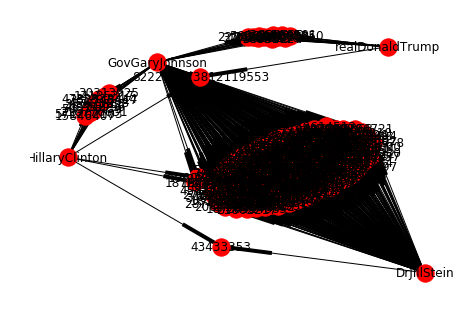

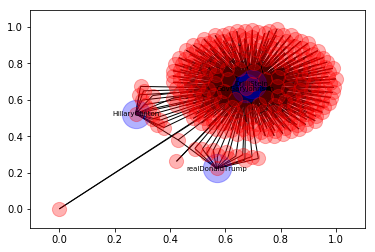

network drawn to network.png
Assignment Completed Successfully !!


In [17]:

if __name__ == '__main__':
    main()

# That's it for now! This should give you an introduction to some of the data we'll study in this course.
